In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
!pip install fredapi > /dev/null

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/jupyter-1.0.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [3]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 200)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [4]:
from fredapi import Fred
fredKey='1d9f2645898e9ed1556ae8a6f84239bc'

fred = Fred(api_key=fredKey)

# Searching For Economic Data

In [5]:
spSearch=fred.search('S&P',order_by='popularity')
spSearch.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-11-16   2023-11-16   
CSUSHPINSA          CSUSHPINSA     2023-11-16   2023-11-16   
SP500                    SP500     2023-11-16   2023-11-16   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-11-16   2023-11-16   
MEHOINUSA672N    MEHOINUSA672N     2023-11-16   2023-11-16   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
SP500                                                     S&P 500   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
MEHOINUSA672N   Real Median Household Income in the United States   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-11-15  Daily, Close   
CSUSHPINSA            1987-01-01      2023-08-01       Monthly   
SP500                 2013-11-18      2023-11-15  Daily, Close   
BAMLH0A0HYM2EY        1996-12-31      2023-11-15  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
BAMLH0A0HYM2EY               D                         Percent   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2023-11-16 09:49:05-06:00   
CSUSHPINSA                           NSA  2023-10-31 08:12:01-05:00   
SP500                                NSA  2023-11-15 19:11:00-06:00   
BAMLH0A0HYM2EY                       NSA  2023-11-16 09:49:10-06:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           93  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
BAMLH0A0HYM2EY         83  This data represents the effective yield of th...  
MEHOINUSA672N          82  Household data are collected as of March.  As ...

# Pull Raw Data & Plot

In [6]:
sp500 = fred.get_series(series_id='SP500')
sp500.head()

2013-11-18    1791.53
2013-11-19    1787.87
2013-11-20    1781.37
2013-11-21    1795.85
2013-11-22    1804.76
dtype: float64

<Axes: title={'center': 'S&P 500'}>

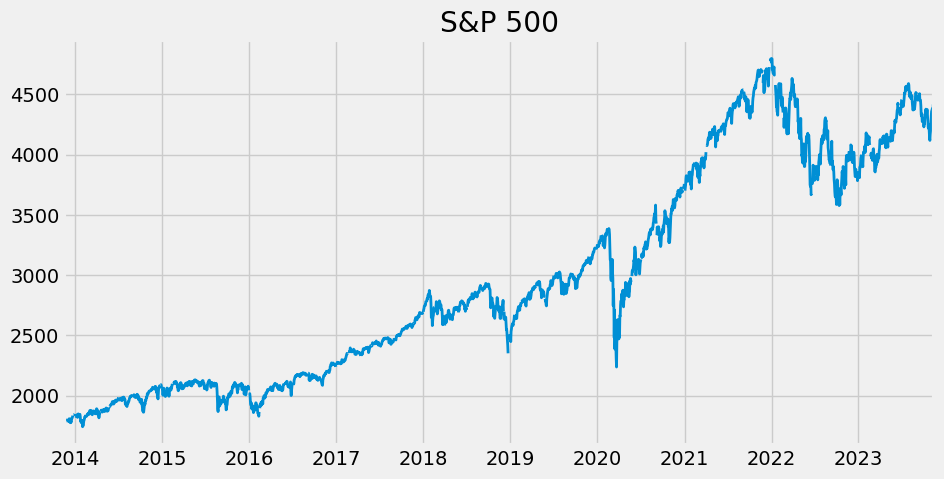

In [7]:
sp500.plot(figsize=(10,5), title='S&P 500',lw=2)

In [8]:
unemploymentResults = fred.search('unemployment')
unemploymentResults.head()

id realtime_start realtime_end  \
series id                                          
UNRATE        UNRATE     2023-11-16   2023-11-16   
UNRATENSA  UNRATENSA     2023-11-16   2023-11-16   
NROU            NROU     2023-11-16   2023-11-16   
CCSA            CCSA     2023-11-16   2023-11-16   
UNEMPLOY    UNEMPLOY     2023-11-16   2023-11-16   

                                             title observation_start  \
series id                                                              
UNRATE                           Unemployment Rate        1948-01-01   
UNRATENSA                        Unemployment Rate        1948-01-01   
NROU              Noncyclical Rate of Unemployment        1949-01-01   
CCSA       Continued Claims (Insured Unemployment)        1967-01-07   
UNEMPLOY                        Unemployment Level        1948-01-01   

          observation_end                frequency frequency_short  \
series id                                                            
UNRATE         2023-10-01                  Monthly               M   
UNRATENSA      2023-10-01                  Monthly               M   
NROU           2025-10-01                Quarterly               Q   
CCSA           2023-11-04  Weekly, Ending Saturday               W   
UNEMPLOY       2023-10-01                  Monthly               M   

                          units        units_short      seasonal_adjustment  \
series id                                                                     
UNRATE                  Percent                  %      Seasonally Adjusted   
UNRATENSA               Percent                  %  Not Seasonally Adjusted   
NROU                    Percent                  %  Not Seasonally Adjusted   
CCSA                     Number             Number      Seasonally Adjusted   
UNEMPLOY   Thousands of Persons  Thous. of Persons      Seasonally Adjusted   

          seasonal_adjustment_short               last_updated popularity  \
series id                                                                   
UNRATE                           SA  2023-11-03 07:50:02-05:00         94   
UNRATENSA                       NSA  2023-11-03 07:50:14-05:00         57   
NROU                            NSA  2023-08-01 11:01:03-05:00         68   
CCSA                             SA  2023-11-16 07:34:02-06:00         74   
UNEMPLOY                         SA  2023-11-03 07:50:05-05:00         69   

                                                       notes  
series id                                                     
UNRATE     The unemployment rate represents the number of...  
UNRATENSA  The unemployment rate represents the number of...  
NROU       Starting with the July, 2021 report: An Update...  
CCSA       Continued claims, also referred to as insured ...  
UNEMPLOY   The series comes from the 'Current Population ...

<Axes: title={'center': 'Monthly unemployment rate'}>

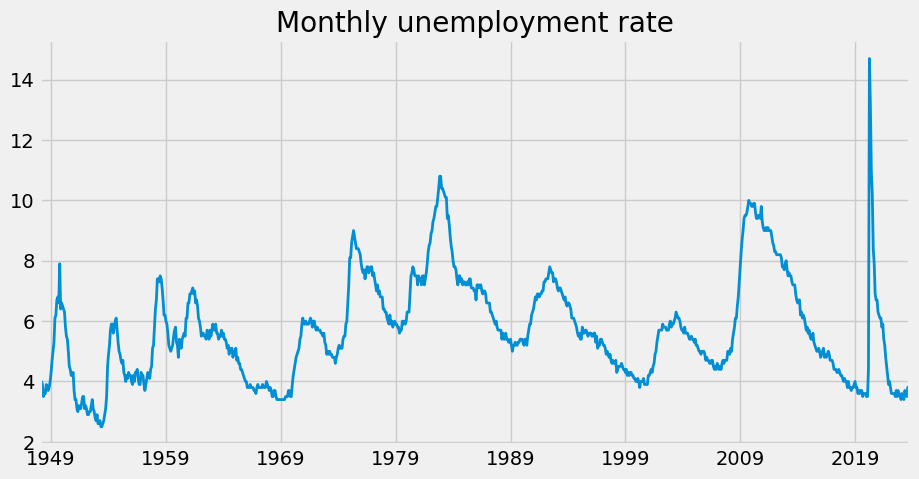

In [9]:
unRate=fred.get_series('UNRATE')
unRate.plot(figsize=(10,5),title='Monthly unemployment rate',lw=2)

# Pull and Join Multiple Data Series

In [10]:
unEmploymentRate =fred.search('unemployment rate state', filter=('frequency','Monthly'), order_by='popularity')
unEmploymentRate=unEmploymentRate.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent" and id.str.len() == 4')
unEmploymentRate['popularity'] = pd.to_numeric(unEmploymentRate['popularity'])
unEmploymentRate=unEmploymentRate.loc[unEmploymentRate['title'].str.contains('Unemployment Rate')]
unEmploymentRate.head()

id realtime_start realtime_end                            title  \
series id                                                                      
CAUR       CAUR     2023-11-16   2023-11-16  Unemployment Rate in California   
TXUR       TXUR     2023-11-16   2023-11-16       Unemployment Rate in Texas   
NYUR       NYUR     2023-11-16   2023-11-16    Unemployment Rate in New York   
FLUR       FLUR     2023-11-16   2023-11-16     Unemployment Rate in Florida   
OHUR       OHUR     2023-11-16   2023-11-16        Unemployment Rate in Ohio   

          observation_start observation_end frequency frequency_short  \
series id                                                               
CAUR             1976-01-01      2023-09-01   Monthly               M   
TXUR             1976-01-01      2023-09-01   Monthly               M   
NYUR             1976-01-01      2023-09-01   Monthly               M   
FLUR             1976-01-01      2023-09-01   Monthly               M   
OHUR             1976-01-01      2023-09-01   Monthly               M   

             units units_short  seasonal_adjustment seasonal_adjustment_short  \
series id                                                                       
CAUR       Percent           %  Seasonally Adjusted                        SA   
TXUR       Percent           %  Seasonally Adjusted                        SA   
NYUR       Percent           %  Seasonally Adjusted                        SA   
FLUR       Percent           %  Seasonally Adjusted                        SA   
OHUR       Percent           %  Seasonally Adjusted                        SA   

                        last_updated  popularity notes  
series id                                               
CAUR       2023-10-24 08:53:02-05:00          61  None  
TXUR       2023-10-24 08:52:02-05:00          53  None  
NYUR       2023-10-24 08:53:03-05:00          52  None  
FLUR       2023-10-24 08:53:04-05:00          48  None  
OHUR       2023-10-24 08:52:03-05:00          41  None

In [11]:
allResults=[]
for myid in unEmploymentRate.index:
    results=fred.get_series(myid)
    results=results.to_frame(name=myid)
    allResults.append(results)
unEmploymentResults=pd.concat(allResults, axis=1)
unEmploymentResults.index.name = 'Date'
unEmploymentResults.head()

CAUR  TXUR  NYUR  FLUR  OHUR  ALUR  MIUR  MAUR  COUR  PAUR  GAUR  \
Date                                                                           
1976-01-01   9.2   5.8  10.3   9.7   8.1   6.6   9.9  10.5   5.8   8.0   8.4   
1976-02-01   9.2   5.8  10.3   9.7   8.1   6.6   9.9  10.5   5.7   8.1   8.4   
1976-03-01   9.1   5.9  10.2   9.6   8.1   6.6   9.9  10.5   5.7   8.1   8.4   
1976-04-01   9.1   5.9  10.2   9.5   8.0   6.5   9.8  10.3   5.6   8.1   8.3   
1976-05-01   9.0   5.9  10.1   9.3   7.8   6.4   9.6  10.1   5.6   8.1   8.1   

            AZUR  MNUR  WAUR  NCUR  WIUR  ORUR  ILUR  VAUR  WVUR  MDUR  AKUR  \
Date                                                                           
1976-01-01  10.2   6.0   8.5   6.4   5.8   9.5   6.6   6.1   7.5   6.4   7.1   
1976-02-01  10.2   6.0   8.5   6.4   5.8   9.5   6.6   6.1   7.5   6.4   7.1   
1976-03-01  10.1   5.9   8.4   6.4   5.7   9.4   6.6   6.1   7.5   6.4   7.0   
1976-04-01  10.0   5.8   8.5   6.3   5.6   9.2   6.6   6.0   7.5   6.4   6.9   
1976-05-01   9.8   5.7   8.5   6.1   5.5   9.1   6.6   5.9   7.4   6.5   6.9   

            IAUR  ARUR  NDUR  TNUR  INUR  NMUR  LAUR  SCUR  HIUR  MOUR  NVUR  \
Date                                                                           
1976-01-01   4.3   7.3   3.4   6.0   6.6   8.6   6.3   7.4   9.8   5.9   9.2   
1976-02-01   4.3   7.3   3.4   6.0   6.6   8.7   6.3   7.4   9.8   5.9   9.2   
1976-03-01   4.3   7.3   3.4   6.0   6.5   8.7   6.3   7.3   9.8   5.9   9.2   
1976-04-01   4.2   7.2   3.5   6.0   6.3   8.6   6.4   7.2   9.7   6.0   9.0   
1976-05-01   4.1   7.1   3.6   5.9   6.0   8.6   6.5   7.0   9.4   6.0   8.9   

            OKUR  MSUR  NJUR  KYUR  DEUR  UTUR  IDUR  DCUR  CTUR  NEUR  MEUR  \
Date                                                                           
1976-01-01   5.8   6.7  10.3   5.6   8.0   5.8   5.6   8.7   9.8   3.3   8.7   
1976-02-01   5.8   6.7  10.3   5.6   8.0   5.9   5.6   8.7   9.8   3.3   8.7   
1976-03-01   5.8   6.6  10.3   5.6   8.0   5.8   5.6   8.6   9.8   3.3   8.6   
1976-04-01   5.8   6.4  10.3   5.6   8.1   5.8   5.6   8.5   9.6   3.2   8.6   
1976-05-01   5.7   6.3  10.3   5.5   8.3   5.7   5.6   8.4   9.4   3.1   8.5   

            WYUR  RIUR  MTUR  NHUR  KSUR  SDUR  VTUR  PRUR  
Date                                                        
1976-01-01   4.1   7.8   5.8   6.5   4.2   3.3   8.6  19.6  
1976-02-01   4.1   7.8   5.8   6.5   4.2   3.3   8.6  19.5  
1976-03-01   4.1   7.7   5.8   6.5   4.2   3.2   8.6  19.3  
1976-04-01   4.0   7.7   5.8   6.5   4.2   3.1   8.6  19.0  
1976-05-01   3.9   7.7   5.8   6.5   4.2   3.1   8.5  18.9

In [12]:
unEmploymentResults=unEmploymentResults.dropna()
idToState=unEmploymentRate['title'].str.replace('Unemployment Rate in ','').to_dict()
unEmploymentResults.columns=[idToState[c] for c in unEmploymentResults.columns]
#list comprehension 
#id to statemapping
unEmploymentResults.head()

California  Texas  New York  Florida  Ohio  Alabama  Michigan  \
Date                                                                        
1976-01-01         9.2    5.8      10.3      9.7   8.1      6.6       9.9   
1976-02-01         9.2    5.8      10.3      9.7   8.1      6.6       9.9   
1976-03-01         9.1    5.9      10.2      9.6   8.1      6.6       9.9   
1976-04-01         9.1    5.9      10.2      9.5   8.0      6.5       9.8   
1976-05-01         9.0    5.9      10.1      9.3   7.8      6.4       9.6   

            Massachusetts  Colorado  Pennsylvania  Georgia  Arizona  \
Date                                                                  
1976-01-01           10.5       5.8           8.0      8.4     10.2   
1976-02-01           10.5       5.7           8.1      8.4     10.2   
1976-03-01           10.5       5.7           8.1      8.4     10.1   
1976-04-01           10.3       5.6           8.1      8.3     10.0   
1976-05-01           10.1       5.6           8.1      8.1      9.8   

            Minnesota  Washington  North Carolina  Wisconsin  Oregon  \
Date                                                                   
1976-01-01        6.0         8.5             6.4        5.8     9.5   
1976-02-01        6.0         8.5             6.4        5.8     9.5   
1976-03-01        5.9         8.4             6.4        5.7     9.4   
1976-04-01        5.8         8.5             6.3        5.6     9.2   
1976-05-01        5.7         8.5             6.1        5.5     9.1   

            Illinois  Virginia  West Virginia  Maryland  Alaska  Iowa  \
Date                                                                    
1976-01-01       6.6       6.1            7.5       6.4     7.1   4.3   
1976-02-01       6.6       6.1            7.5       6.4     7.1   4.3   
1976-03-01       6.6       6.1            7.5       6.4     7.0   4.3   
1976-04-01       6.6       6.0            7.5       6.4     6.9   4.2   
1976-05-01       6.6       5.9            7.4       6.5     6.9   4.1   

            Arkansas  North Dakota  Tennessee  Indiana  New Mexico  Louisiana  \
Date                                                                            
1976-01-01       7.3           3.4        6.0      6.6         8.6        6.3   
1976-02-01       7.3           3.4        6.0      6.6         8.7        6.3   
1976-03-01       7.3           3.4        6.0      6.5         8.7        6.3   
1976-04-01       7.2           3.5        6.0      6.3         8.6        6.4   
1976-05-01       7.1           3.6        5.9      6.0         8.6        6.5   

            South Carolina  Hawaii  Missouri  Nevada  Oklahoma  Mississippi  \
Date                                                                          
1976-01-01             7.4     9.8       5.9     9.2       5.8          6.7   
1976-02-01             7.4     9.8       5.9     9.2       5.8          6.7   
1976-03-01             7.3     9.8       5.9     9.2       5.8          6.6   
1976-04-01             7.2     9.7       6.0     9.0       5.8          6.4   
1976-05-01             7.0     9.4       6.0     8.9       5.7          6.3   

            New Jersey  Kentucky  Delaware  Utah  Idaho  \
Date                                                      
1976-01-01        10.3       5.6       8.0   5.8    5.6   
1976-02-01        10.3       5.6       8.0   5.9    5.6   
1976-03-01        10.3       5.6       8.0   5.8    5.6   
1976-04-01        10.3       5.6       8.1   5.8    5.6   
1976-05-01        10.3       5.5       8.3   5.7    5.6   

            the District of Columbia  Connecticut  Nebraska  Maine  Wyoming  \
Date                                                                          
1976-01-01                       8.7          9.8       3.3    8.7      4.1   
1976-02-01                       8.7          9.8       3.3    8.7      4.1   
1976-03-01                       8.6          9.8       3.3    8.6      4.1   
1976-04-01                

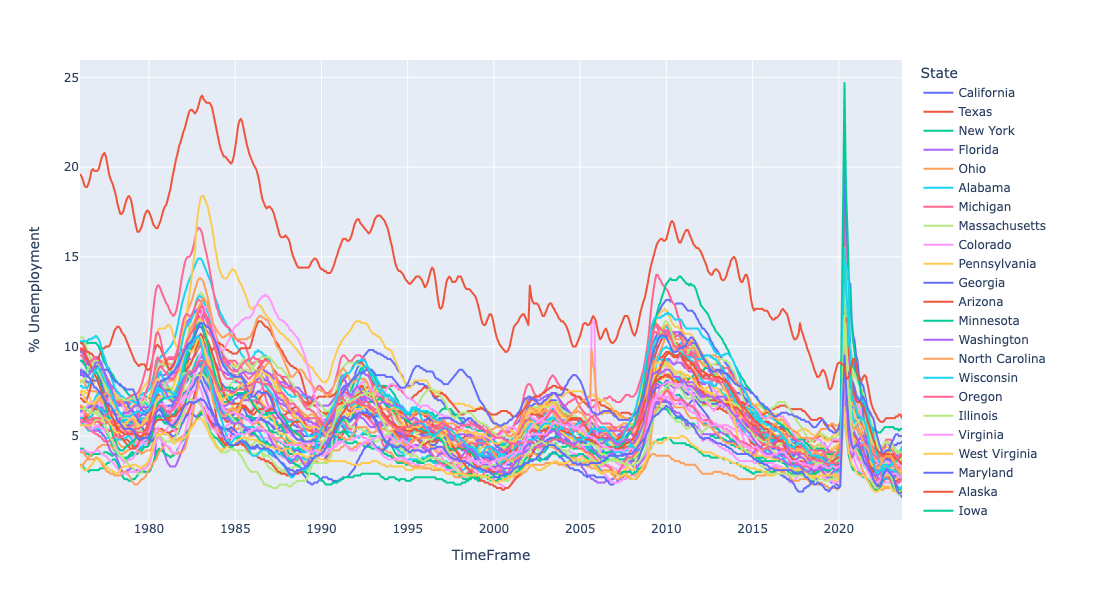

In [13]:
px.line(unEmploymentResults,labels={
                     "Date": "TimeFrame",
                     "value": "% Unemployment",
                     "variable": "State"
                 },width=1100,height=600)

# 2020 Unemployment Rate Per State

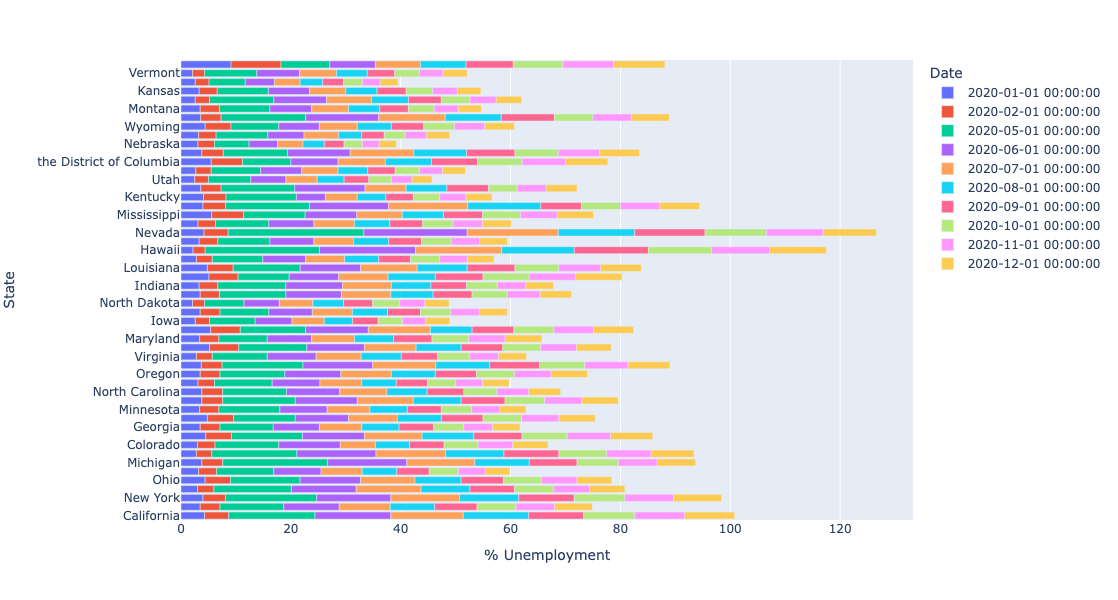

In [14]:
unEmploymentResultsPerState=unEmploymentResults[unEmploymentResults.index.isin(pd.date_range("2020-01-01", "2020-12-31"))]
px.bar(unEmploymentResultsPerState.T,labels={
                     "index": "State",
                     "value": "% Unemployment",
                     "variable": "State"
                 },orientation='h',width=1100, height=600)

# Pull Participation Rate

In [15]:
unParticipationRate =fred.search('participation rate state', filter=('frequency','Monthly'))
unParticipationRate=unParticipationRate.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent" and id.str.len()==7')
unParticipationRate= unParticipationRate.drop('CIVPART')
unParticipationRate.head()

id realtime_start realtime_end  \
series id                                        
LBSSA06    LBSSA06     2023-11-16   2023-11-16   
LBSSA21    LBSSA21     2023-11-16   2023-11-16   
LBSSA01    LBSSA01     2023-11-16   2023-11-16   
LBSSA26    LBSSA26     2023-11-16   2023-11-16   
LBSSA36    LBSSA36     2023-11-16   2023-11-16   

                                                   title observation_start  \
series id                                                                    
LBSSA06    Labor Force Participation Rate for California        1976-01-01   
LBSSA21      Labor Force Participation Rate for Kentucky        1976-01-01   
LBSSA01       Labor Force Participation Rate for Alabama        1976-01-01   
LBSSA26      Labor Force Participation Rate for Michigan        1976-01-01   
LBSSA36      Labor Force Participation Rate for New York        1976-01-01   

          observation_end frequency frequency_short    units units_short  \
series id                                                                  
LBSSA06        2023-09-01   Monthly               M  Percent           %   
LBSSA21        2023-09-01   Monthly               M  Percent           %   
LBSSA01        2023-09-01   Monthly               M  Percent           %   
LBSSA26        2023-09-01   Monthly               M  Percent           %   
LBSSA36        2023-09-01   Monthly               M  Percent           %   

           seasonal_adjustment seasonal_adjustment_short  \
series id                                                  
LBSSA06    Seasonally Adjusted                        SA   
LBSSA21    Seasonally Adjusted                        SA   
LBSSA01    Seasonally Adjusted                        SA   
LBSSA26    Seasonally Adjusted                        SA   
LBSSA36    Seasonally Adjusted                        SA   

                        last_updated popularity  \
series id                                         
LBSSA06    2023-10-20 09:01:05-05:00         15   
LBSSA21    2023-10-20 09:01:01-05:00         24   
LBSSA01    2023-10-20 09:01:09-05:00          7   
LBSSA26    2023-10-20 09:01:03-05:00         23   
LBSSA36    2023-10-20 09:01:06-05:00         21   

                                                       notes  
series id                                                     
LBSSA06    A state's labor-force participation rate is th...  
LBSSA21    A state's labor-force participation rate is th...  
LBSSA01    A state's labor-force participation rate is th...  
LBSSA26    A state's labor-force participation rate is th...  
LBSSA36    A state's labor-force participation rate is th...

In [16]:
idToState=unParticipationRate['title'].str.replace('Labor Force Participation Rate for ','').to_dict()
allResults=[]
for myid in unParticipationRate.index:
    results=fred.get_series(myid)
    results=results.to_frame(name=myid)
    allResults.append(results)
unParticipationResults=pd.concat(allResults, axis=1)
unParticipationResults.index.name = 'Date'
unParticipationResults.columns=[idToState[c] for c in unParticipationResults.columns]
unParticipationResults.head()

California  Kentucky  Alabama  Michigan  New York  Wisconsin  \
Date                                                                       
1976-01-01        62.6      60.5     57.0      61.6      58.0       65.6   
1976-02-01        62.4      60.3     56.9      61.5      58.0       65.5   
1976-03-01        62.2      60.2     56.8      61.5      58.0       65.4   
1976-04-01        62.2      60.1     56.8      61.6      58.0       65.4   
1976-05-01        62.3      60.1     56.8      61.7      58.1       65.5   

            Ohio  Georgia  Illinois  Florida  Mississippi  Texas  \
Date                                                               
1976-01-01  61.7     63.7      63.0     55.8         58.8   63.8   
1976-02-01  61.7     63.6      63.0     55.7         58.6   63.5   
1976-03-01  61.7     63.5      62.9     55.5         58.5   63.4   
1976-04-01  61.6     63.5      62.9     55.5         58.5   63.5   
1976-05-01  61.6     63.6      63.0     55.4         58.5   63.6   

            Pennsylvania  Utah  Maryland  West Virginia  Minnesota  \
Date                                                                 
1976-01-01          58.4  62.8      64.3           52.5       65.6   
1976-02-01          58.3  62.6      64.2           52.4       65.5   
1976-03-01          58.3  62.5      64.1           52.3       65.4   
1976-04-01          58.3  62.5      64.1           52.3       65.4   
1976-05-01          58.3  62.6      64.1           52.2       65.5   

            South Carolina  Colorado  Massachusetts  Tennessee  Arizona  \
Date                                                                      
1976-01-01            65.3      67.2           64.8       59.6     59.5   
1976-02-01            65.2      67.0           64.7       59.4     59.2   
1976-03-01            65.0      66.8           64.6       59.3     59.1   
1976-04-01            64.9      66.6           64.6       59.3     59.1   
1976-05-01            64.7      66.5           64.6       59.4     59.1   

            New Mexico  Louisiana  Iowa  Nebraska  Connecticut  Oklahoma  \
Date                                                                       
1976-01-01        60.8       56.8  64.4      64.9         64.2      59.3   
1976-02-01        60.5       56.6  64.3      64.9         64.1      59.2   
1976-03-01        60.3       56.5  64.2      64.8         64.0      59.1   
1976-04-01        60.3       56.4  64.1      64.8         64.1      59.0   
1976-05-01        60.3       56.4  64.1      64.8         64.3      59.0   

            Washington  Maine  Virginia  Nevada  Arkansas  North Carolina  \
Date                                                                        
1976-01-01        60.9   62.1      65.9    71.3      57.9            66.5   
1976-02-01        60.7   61.9      65.8    70.8      57.8            66.3   
1976-03-01        60.6   61.9      65.6    70.5      57.7            66.2   
1976-04-01        60.6   61.8      65.5    70.4      57.7            66.2   
1976-05-01        60.7   61.7      65.4    70.5      57.7            66.3   

            Indiana  New Hampshire  Missouri  Alaska  Oregon  New Jersey  \
Date                                                                       
1976-01-01     64.0           65.9      60.5    69.0    62.9        61.5   
1976-02-01     63.9           65.6      60.3    68.4    62.7        61.4   
1976-03-01     63.8           65.6      60.3    67.8    62.5        61.4   
1976-04-01     63.8           65.7      60.4    67.9    62.4        61.5   
1976-05-01     63.9           66.0      60.6    67.9    62.5        61.6   

            Idaho  Kansas  South Dakota  Vermont  Montana  Hawaii  \
Date                                                                
1976-01-01   63.0    65.1          64.6     63.6     62.7    69.9   
1976-02-01   62.8    65.0          64.4     63.4     62.5    69.6   
1976-03-01   62.7    64.9          64.4     63.2     62.4    69.6   
1976-04-01   62.7    65.0         

In [17]:
unParticipationStates=unParticipationResults.T
unParticipationStates.shape

(51, 573)

In [18]:
unEmploymentStates=unEmploymentResults.T
unEmploymentStates.shape

(52, 571)

In [19]:
states = unEmploymentStates.loc[unEmploymentStates.index.isin(unParticipationStates.index)].index.tolist()
len(states)

50

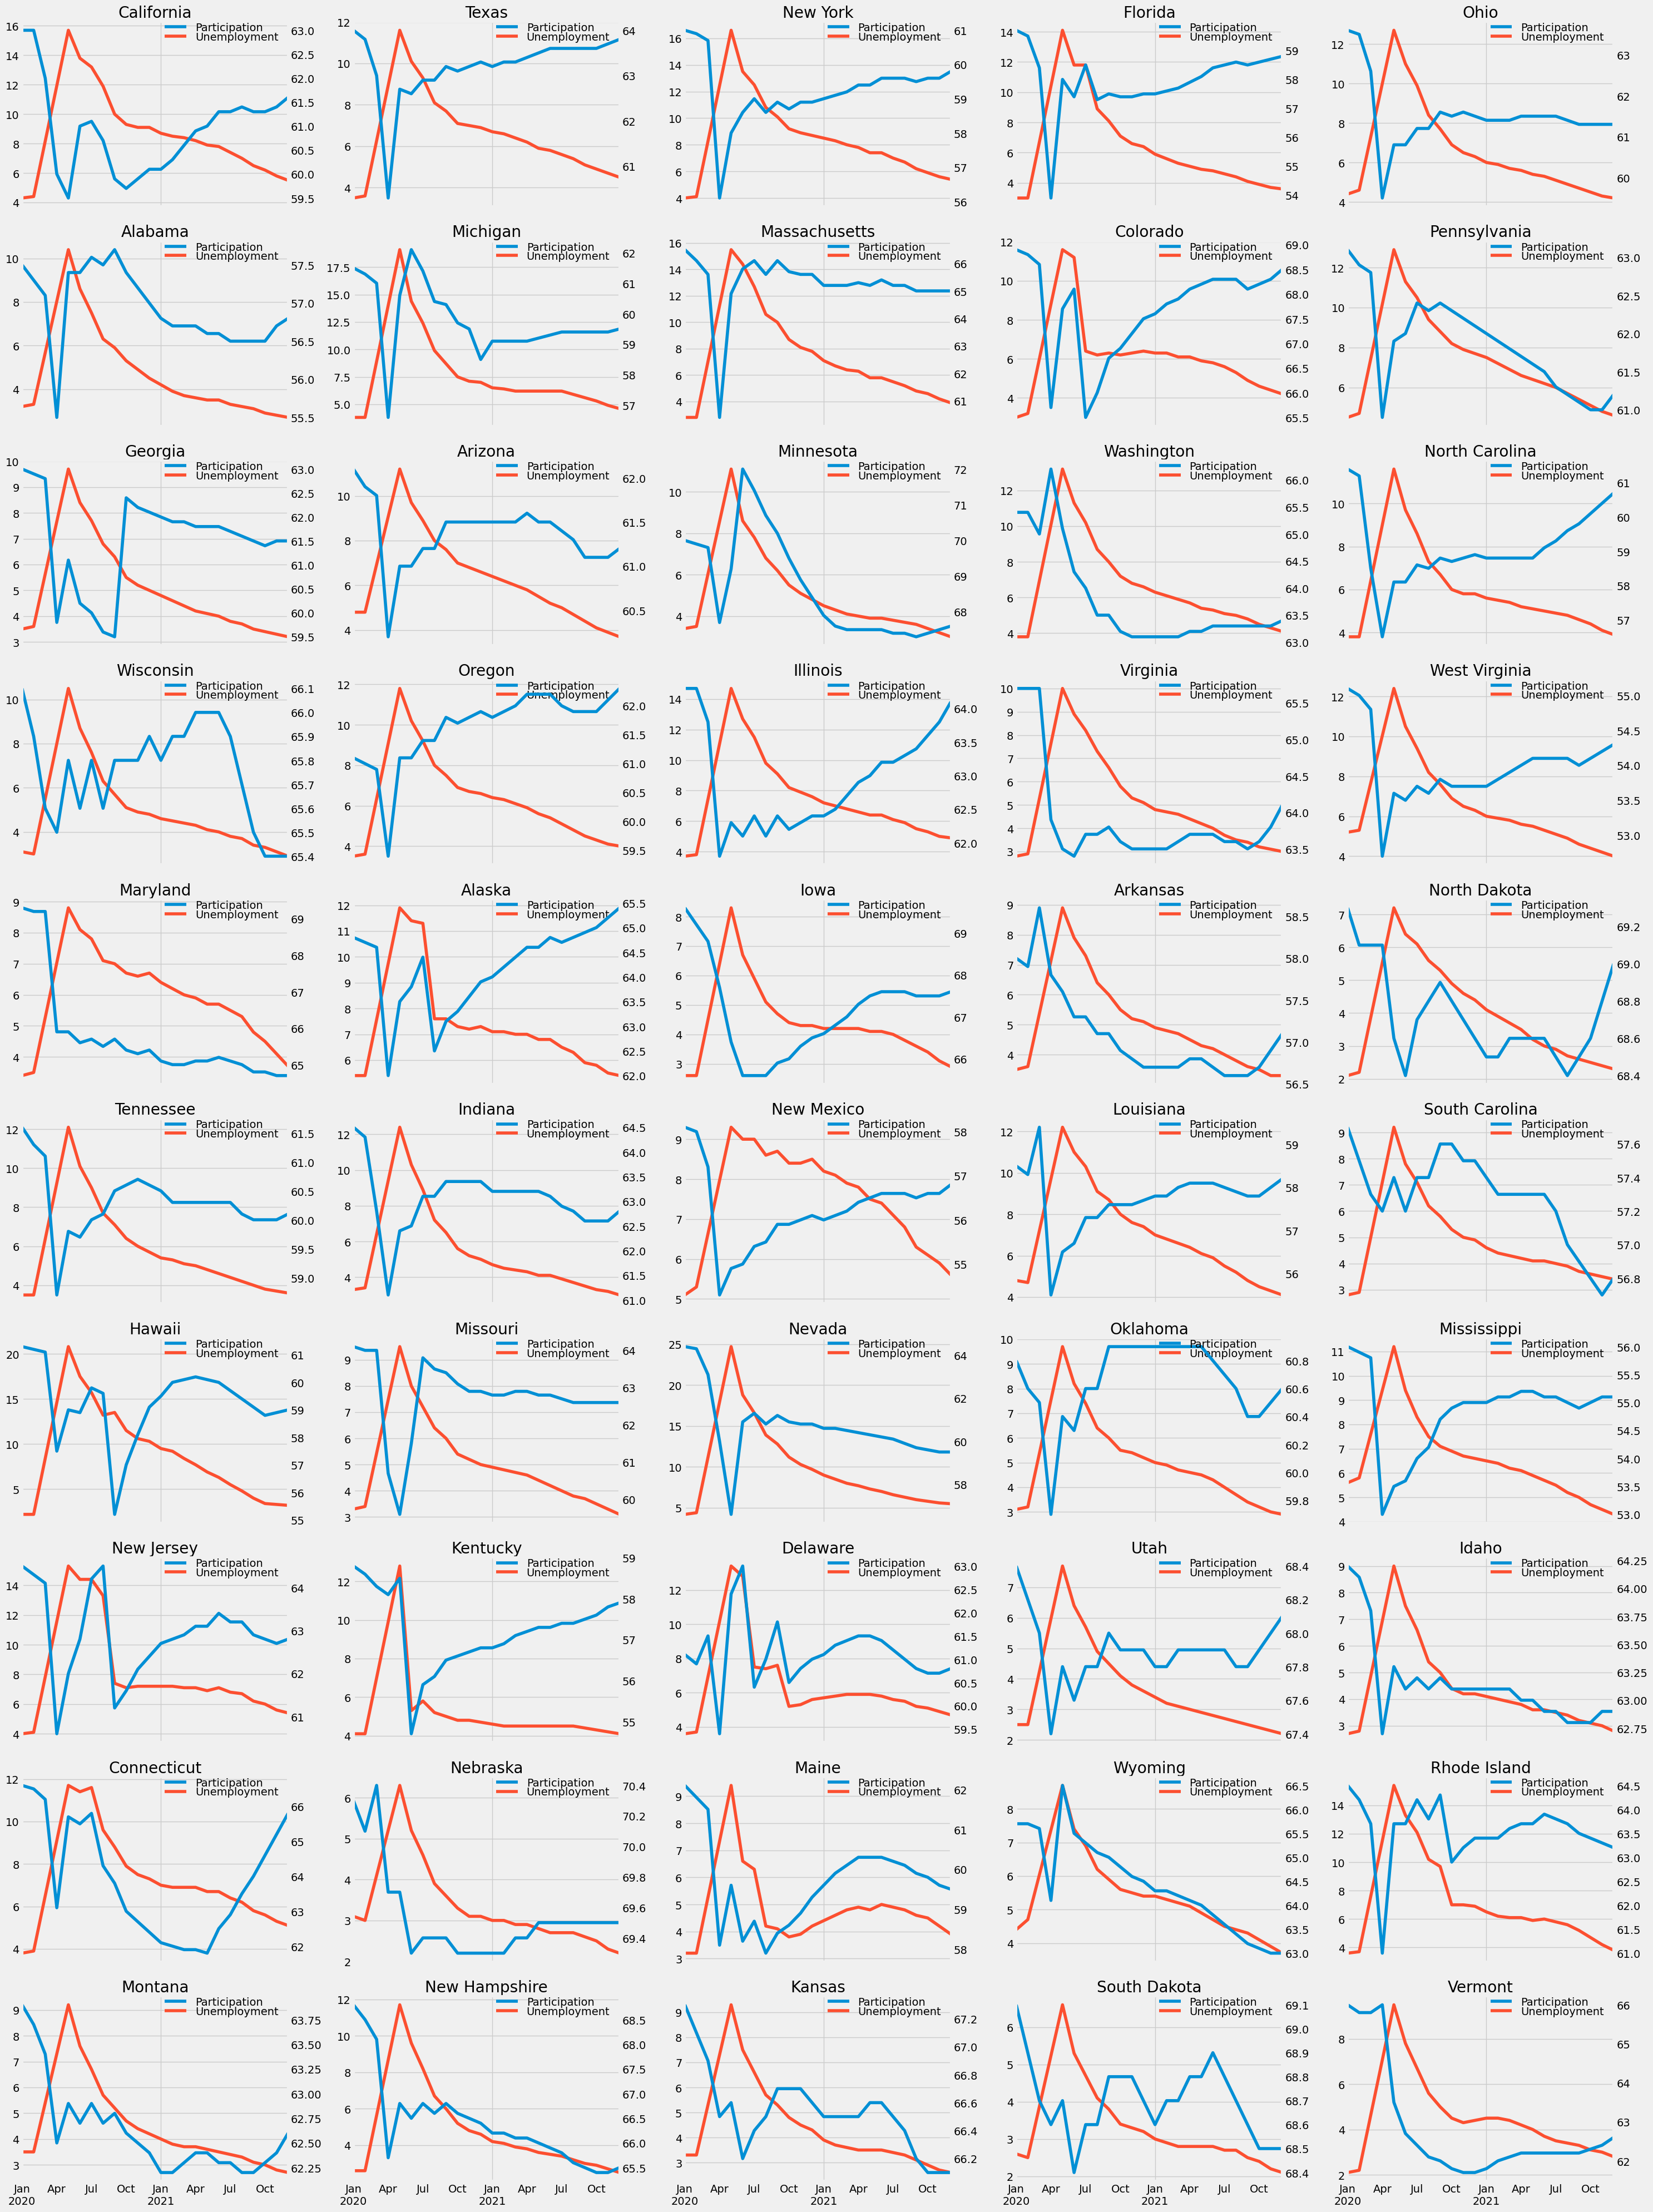

In [20]:
fig, ax = plt.subplots(10,5,figsize=(30,40),sharex=True)
ax=ax.flatten()

i=0
for state in states:
    ax[i].xaxis.label.set_visible(False)
    ax2 = ax[i].twinx()
    unParticipationResults.query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label='Participation')
    unEmploymentResults.query('index >= 2020 and index < 2022')[state].plot(ax=ax[i], label='Unemployment',color=color_pal[1])
    ax2.grid(False)
    ax[i].legend(loc='upper left', bbox_to_anchor=(0.5, 1), frameon=False)
    ax2.legend(loc='upper left', bbox_to_anchor=(0.5, 1.05), frameon=False)
    plt.subplots_adjust(top=0.45)
    ax[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()